In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [71]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [72]:
train.shape , test.shape

((10683, 11), (2671, 10))

In [73]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [74]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [75]:
cat_data = train.select_dtypes(include = 'object')
num_data = train.select_dtypes(include = ['int64','float64'])

In [76]:
print("Total number of categorical data are:" , cat_data.shape[1])
print('Total number of numerical data are: ', num_data.shape[1])

Total number of categorical data are: 10
Total number of numerical data are:  1


In [77]:
train['Date'] = pd.to_datetime(train['Date_of_Journey']).dt.day
train['Month'] = pd.to_datetime(train['Date_of_Journey']).dt.month
train['Year'] = pd.to_datetime(train['Date_of_Journey']).dt.year

test['Date'] = pd.to_datetime(test['Date_of_Journey']).dt.day
test['Month'] = pd.to_datetime(test['Date_of_Journey']).dt.month
test['Year'] = pd.to_datetime(test['Date_of_Journey']).dt.year

In [78]:
print("Total number of unique year are %s and the unique years are %s"%(train['Year'].nunique() , train['Year'].unique()))
print("Total number of unique months are %s and the unique months are %s"%(train['Month'].nunique() , train['Month'].unique()))
print("Total number of unique Dates are %s and the unique Dates are %s"%(train['Date'].nunique() , train['Date'].unique()))

Total number of unique year are 1 and the unique years are [2019]
Total number of unique months are 7 and the unique months are [ 3  1  9 12  6  5  4]
Total number of unique Dates are 9 and the unique Dates are [24  5  6  3 27 18 15 21  4]


In [79]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [80]:
time_arrival = []
for i in range(0,len(train)):
    dummy = train['Arrival_Time'][i].split()[0]
    time_arrival.append(dummy)
train['Time_of_arrival'] = time_arrival

time_arrival = []
for i in range(0,len(test)):
    dummy = test['Arrival_Time'][i].split()[0]
    time_arrival.append(dummy)
test['Time_of_arrival'] = time_arrival

In [81]:
train[['Dur_hr','Dur_min']] = train['Duration'].str.split(expand=True)
train['Dur_min'] = train['Dur_min'].fillna('0m')
train['Dur_min'] = train['Dur_min'].str.replace('m','').astype('int64')
train['Dur_hr'] = train['Dur_hr'].str.replace('h','').str.replace('m','').astype('int64')

test[['Dur_hr','Dur_min']] = test['Duration'].str.split(expand=True)
test['Dur_min'] = test['Dur_min'].fillna('0m')
test['Dur_min'] = test['Dur_min'].str.replace('m','').astype('int64')
test['Dur_hr'] = test['Dur_hr'].str.replace('h','').str.replace('m','').astype('int64')

In [82]:
train[['Dep_Time_hr','Dep_time_min']] = train['Dep_Time'].str.split(':',expand=True).astype('int64')

test[['Dep_Time_hr','Dep_time_min']] = test['Dep_Time'].str.split(':',expand=True).astype('int64')

In [83]:
#training
time = []
def total(hr,min):
    return hr*60 + min

for i in range(0,len(train)):
    dummy = total(train['Dur_hr'][i] , train['Dur_min'][i])
    time.append(dummy)
train['Total_Time'] = time

#testing
time = []
def total(hr,min):
    return hr*60 + min

for i in range(0,len(test)):
    dummy = total(test['Dur_hr'][i] , test['Dur_min'][i])
    time.append(dummy)
test['Total_Time'] = time

In [84]:
train['Total_Stops'] = train['Total_Stops'].str.replace('non-stop','0 stop')
train['Total_Stops'] = train['Total_Stops'].fillna('0 stop')
stops = []
for i in range(0,len(train)):
    dummy = train['Total_Stops'][i].split()[0]
    stops.append(dummy)
train['Total_Stops'] = stops
train['Total_Stops'] = train['Total_Stops'].astype('int64')

test['Total_Stops'] = test['Total_Stops'].str.replace('non-stop','0 stop')
test['Total_Stops'] = test['Total_Stops'].fillna('0 stop')
stops = []
for i in range(0,len(test)):
    dummy = test['Total_Stops'][i].split()[0]
    stops.append(dummy)
test['Total_Stops'] = stops
test['Total_Stops'] = test['Total_Stops'].astype('int64')

We can create another column where we can see during which part of the day the flight was arranged. Example - morning , afternoon, evening, night
morning time will be 6 to 12
afternoon time will be 12 to 16
evening will be 16 to 19
night will be 19 to 6
These time are military time
We can also use the approach of am and pm but i find this to be better for taking insights

In [85]:
lst = []
for i in range(0,len(train)):
    if (train['Dep_Time_hr'][i] >= 5) & (train['Dep_Time_hr'][i] <12):
        dummy = 'Morning'
    elif (train['Dep_Time_hr'][i] >=12) & (train['Dep_Time_hr'][i] < 16):
        dummy = 'Afternoon'
    elif (train['Dep_Time_hr'][i] >=16) & (train['Dep_Time_hr'][i] <19):
        dummy = 'Evening'
    else:
        dummy = 'Night'
    lst.append(dummy)
train['Part_of_day'] = lst

lst = []
for i in range(0,len(test)):
    if (test['Dep_Time_hr'][i] >= 5) & (test['Dep_Time_hr'][i] <12):
        dummy = 'Morning'
    elif (test['Dep_Time_hr'][i] >=12) & (test['Dep_Time_hr'][i] < 16):
        dummy = 'Afternoon'
    elif (test['Dep_Time_hr'][i] >=16) & (test['Dep_Time_hr'][i] <19):
        dummy = 'Evening'
    else:
        dummy = 'Night'
    lst.append(dummy)
test['Part_of_day'] = lst

In [86]:
test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Date,Month,Year,Time_of_arrival,Dur_hr,Dur_min,Dep_Time_hr,Dep_time_min,Total_Time,Part_of_day
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,6,2019,04:25,10,55,17,30,655,Evening
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,5,12,2019,10:20,4,0,6,20,240,Morning


In [87]:
pd.set_option('display.max_columns',None)
train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Date,Month,Year,Time_of_arrival,Dur_hr,Dur_min,Dep_Time_hr,Dep_time_min,Total_Time,Part_of_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3898,24,3,2019,01:10,2,50,22,20,170,Night
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7663,5,1,2019,13:15,7,25,5,50,445,Morning


In [89]:
df_train = train.drop(columns = ['Dep_Time','Duration','Additional Info','Dur_hr','Dur_min','Dep_Time_hr','Dep_time_min','Date_of_Journey','Route','Arrival_Time','Time_of_arrival','Year'])

df_test = test.drop(columns = ['Dep_Time','Duration','Additional Info','Dur_hr','Dur_min','Dep_Time_hr','Dep_time_min','Date_of_Journey','Route','Arrival_Time','Time_of_arrival'])

In [91]:
df_train = df_train[['Airline','Source','Destination','Total_Stops','Date','Month','Total_Time','Part_of_day','Price']]

df_test = df_test[['Airline','Source','Destination','Total_Stops','Date','Month','Total_Time','Part_of_day']]

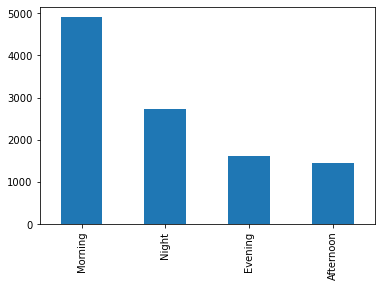

In [92]:
df_train['Part_of_day'].value_counts().plot.bar()
plt.show()

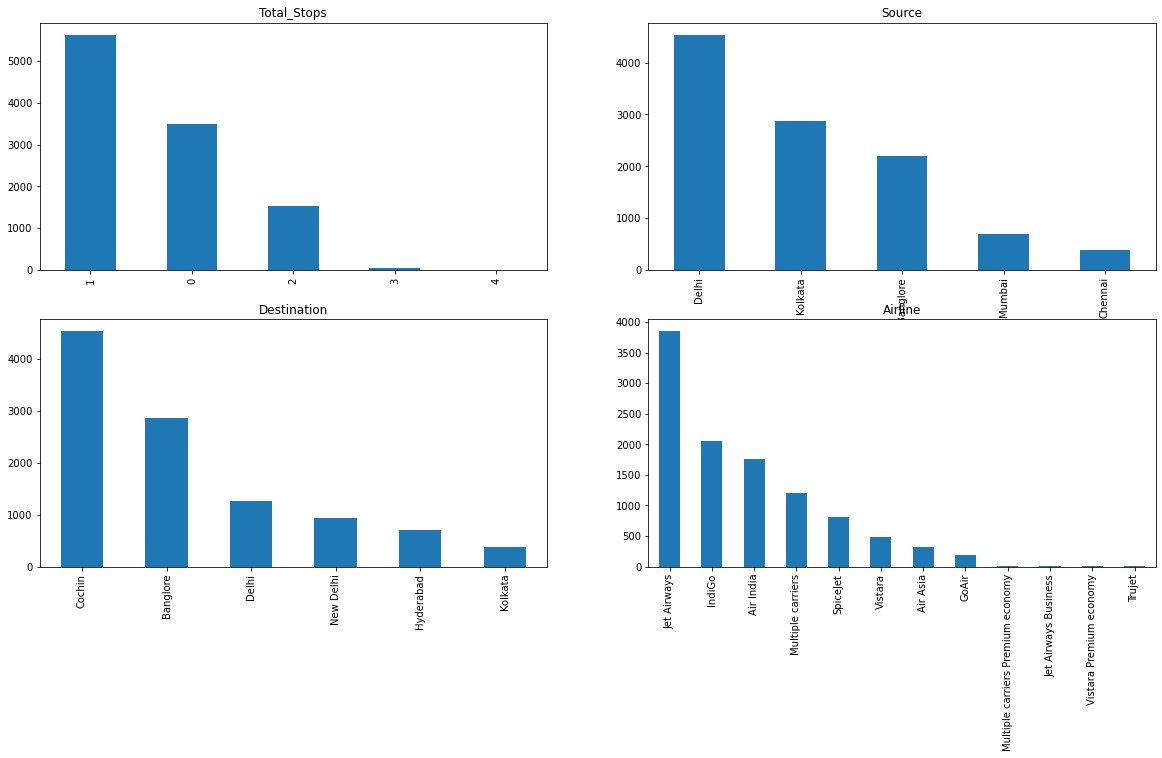

In [93]:
plt.figure(1) 
plt.subplot(221) 
df_train['Total_Stops'].value_counts(normalize=False).plot.bar(title= 'Total_Stops') 
plt.subplot(222) 
df_train['Source'].value_counts(normalize=False).plot.bar(title= 'Source') 
plt.subplot(223) 
df_train['Destination'].value_counts(normalize=False).plot.bar(title= 'Destination') 
plt.subplot(224) 
df_train['Airline'].value_counts(normalize=False).plot.bar(figsize=(20,10), title= 'Airline') 

plt.show()

In [94]:
trail = df_train.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trail['Airline'] = le.fit_transform(trail['Airline'])
trail['Source'] = le.fit_transform(trail['Source'])
trail['Destination'] = le.fit_transform(trail['Destination'])

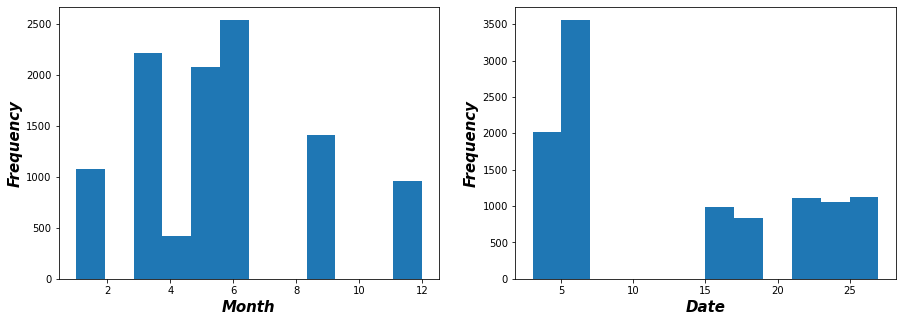

In [95]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121) 
plt.hist(df_train['Month'] , bins=12)
plt.xlabel('Month',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')

plt.subplot(122) 
plt.hist(df_train['Date'] , bins=12)
plt.xlabel('Date',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.ylabel('Frequency',fontsize = 15 , fontweight='bold' , fontstyle='italic')
plt.show()

<Figure size 1080x1080 with 0 Axes>

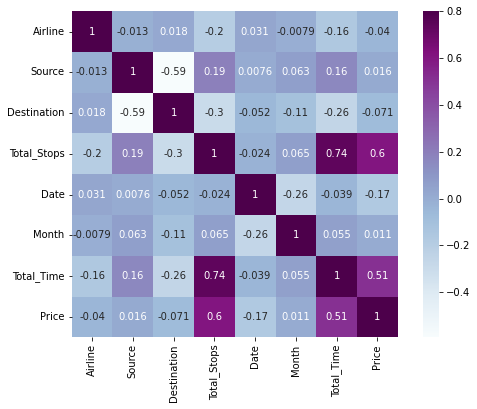

In [96]:
plt.figure(figsize = (15,15))
matrix = trail.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot = True);

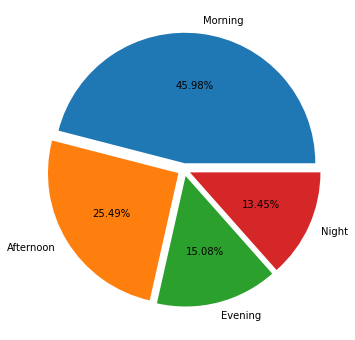

In [97]:
plt.figure(figsize = (10,6))
plt.pie(df_train.Part_of_day.value_counts() , autopct='%1.2f%%' , radius=1 ,labels=['Morning','Afternoon','Evening','Night']
       ,explode=[0.05,0.05,0.05,0.05])
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Total_Time'>

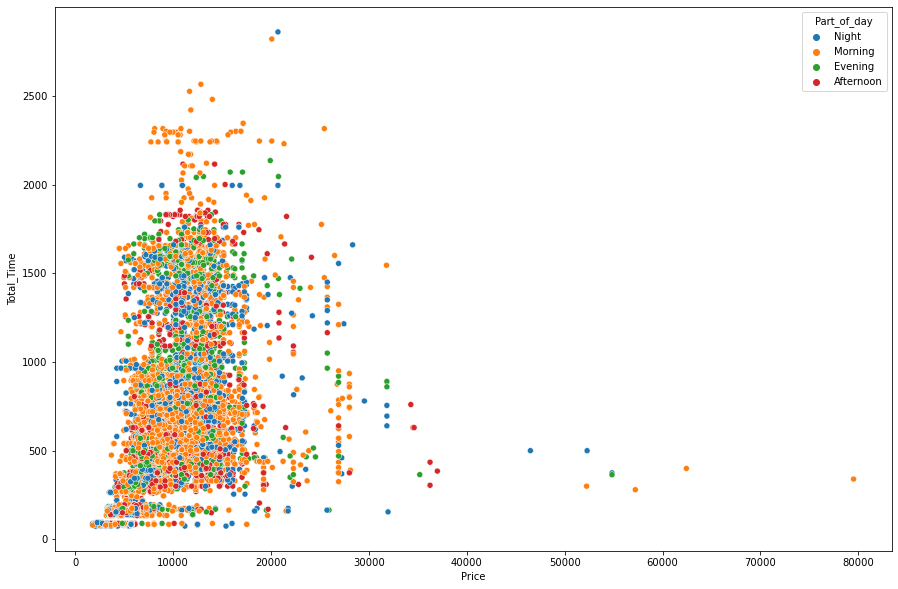

In [98]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Price',y = 'Total_Time',hue = 'Part_of_day',data=df_train)

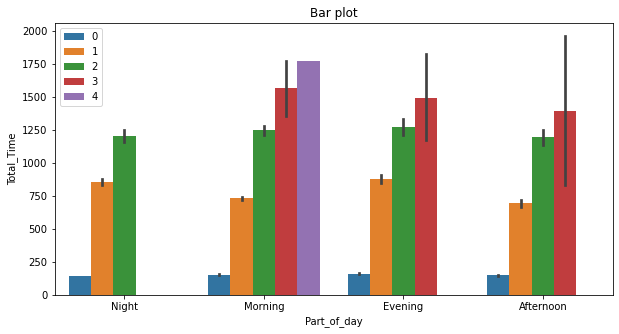

In [99]:
fig=plt.subplots(figsize=(10,5))
sns.barplot(x='Part_of_day',y='Total_Time' , data=df_train, hue='Total_Stops')
plt.title('Bar plot')
plt.legend()
plt.show()

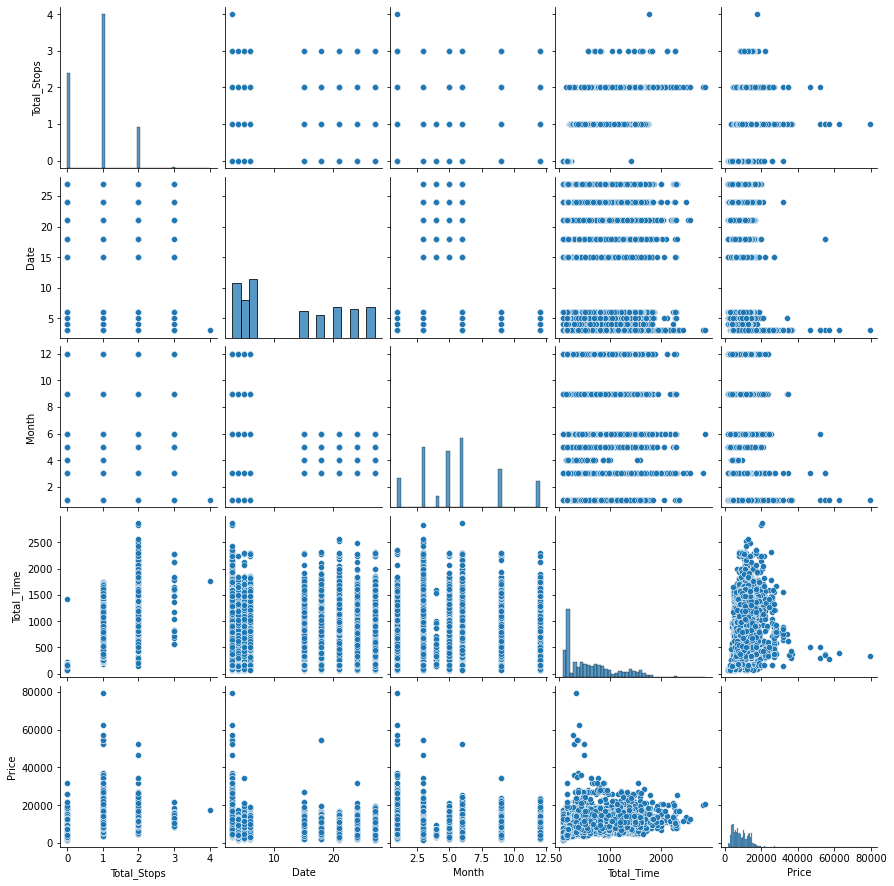

In [100]:
sns.pairplot(df_train)
plt.show()

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Airline'] = le.fit_transform(df_train['Airline'])
df_train['Source'] = le.fit_transform(df_train['Source'])
df_train['Destination'] = le.fit_transform(df_train['Destination'])
df_train['Part_of_day'] = le.fit_transform(df_train['Part_of_day'])

df_test['Airline'] = le.fit_transform(df_test['Airline'])
df_test['Source'] = le.fit_transform(df_test['Source'])
df_test['Destination'] = le.fit_transform(df_test['Destination'])
df_test['Part_of_day'] = le.fit_transform(df_test['Part_of_day'])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
x = df_train.drop(columns='Price')
y = df_train['Price']
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []
r2_score = []

In [38]:
data = pd.DataFrame({'Algorithm':algos})
data

,Algorithm
0,LinearRegression()
1,Ridge()
2,Lasso()
3,KNeighborsRegressor()
4,DecisionTreeRegressor()


In [39]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
itterations = []
for training,testing in kf.split(x,y): 
    x_train,x_test = x.iloc[training] , x.iloc[testing]
    y_train,y_test = y.iloc[training] , y.iloc[testing]
    for algo in algos:
        model = algo
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = metrics.r2_score(y_test,y_pred)
        itterations.append(score)
    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
    col = 'itter{}'.format(i)
    i = i+1
    data[col] = itterations
    itterations = []


1 of kfold 5

2 of kfold 5

3 of kfold 5

4 of kfold 5

5 of kfold 5


In [40]:
data

,Algorithm,itter1,itter2,itter3,itter4,itter5
0,LinearRegression(),0.419190,0.446990,0.397023,0.417403,0.430310
1,Ridge(),0.419185,0.447004,0.397022,0.417399,0.430309
2,Lasso(),0.419179,0.447030,0.397002,0.417403,0.430308
3,KNeighborsRegressor(),0.503474,0.576763,0.497714,0.539892,0.580588
4,DecisionTreeRegressor(),0.690698,0.677962,0.568687,0.696348,0.582117


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestRegressor(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state=1)
 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [42]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=13, n_estimators=141, random_state=1)

In [43]:
data = pd.DataFrame({'Algorithm':['RandomForest']})
from sklearn.model_selection import StratifiedKFold
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
answer = []
for training,testing in kf.split(x,y): 
    x_train,x_test = x.iloc[training] , x.iloc[testing]
    y_train,y_test = y.iloc[training] , y.iloc[testing]
    model = RandomForestRegressor(max_depth=13, n_estimators=141, random_state=1)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = metrics.r2_score(y_test,y_pred)
    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
    col = 'itter{}'.format(i)
    i = i+1
    answer.append(score)


1 of kfold 5

2 of kfold 5

3 of kfold 5

4 of kfold 5

5 of kfold 5


In [44]:
dummy = sum(answer)/len(answer)

In [45]:
data['answer'] = dummy

In [46]:
data

,Algorithm,answer
0,RandomForest,0.792999


In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(XGBRegressor(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state=1)
 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=1, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                             

In [48]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=141, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [49]:
data = pd.DataFrame({'Algorithm':['XGBOOST']})
from sklearn.model_selection import StratifiedKFold
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
answer = []
for training,testing in kf.split(x,y): 
    x_train,x_test = x.iloc[training] , x.iloc[testing]
    y_train,y_test = y.iloc[training] , y.iloc[testing]
    model = grid_search.best_estimator_
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = metrics.r2_score(y_test,y_pred)
    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
    col = 'itter{}'.format(i)
    i = i+1
    answer.append(score)


1 of kfold 5

2 of kfold 5

3 of kfold 5

4 of kfold 5

5 of kfold 5


In [50]:
dummy = sum(answer)/len(answer)
data['answer'] = dummy

In [51]:
data

,Algorithm,answer
0,XGBOOST,0.820074


In [53]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Total_Time,Part_of_day,Price
0,3,0,5,0,24,3,170,3,3898
1,1,3,0,2,5,1,445,2,7663
2,4,2,1,2,6,9,1140,2,13883
3,3,3,0,1,5,12,325,1,6219
4,3,0,5,1,3,1,285,1,13303


In [102]:
from sklearn.model_selection import train_test_split
x_train = df_train.drop(columns='Price')
y_train = df_train['Price']
x_test = df_test.copy()

In [105]:

model = grid_search.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [106]:
y_pred

array([11619.732 ,  4871.2114, 12821.591 , ..., 16707.373 , 12904.576 ,
        8001.6694], dtype=float32)

In [107]:
df_test['Price'] = y_pred

In [108]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Total_Time,Part_of_day,Price
0,4,2,1,1,6,6,655,1,11619.732422
1,3,3,0,1,5,12,240,2,4871.211426
2,4,2,1,1,21,5,1425,3,12821.590820
3,6,2,1,1,21,5,780,2,10643.737305
4,0,0,2,0,24,6,170,3,3890.917969
